# HBV model

Andrew Ireson, 19 March 2022

HBV model structure:

<img src='HBV.png'>

Oldman and Banff basins: 

<img src='basins.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

import sys
sys.path.insert(1,'lib')

# Select here which model to run:
sys.path.insert(1,'hbv')

import model_library as model

import time

In [2]:
# Pick basin:
basin='Banff basin'

In [3]:
# Load observed streamflow
Qobs=model.obs_streamflow(basin)

In [4]:
# Initial parameter guesses
par_values={}
par_values['TT']=0
par_values['C0']=1
par_values['ETF']=0.1
par_values['LP']=0.3
par_values['FC']=250
par_values['beta']=2
par_values['FRAC']=0.7
par_values['K1']=0.05
par_values['alpha']=1.5
par_values['K2']=0.01
par_values['UBAS']=1
par_values['PM']=1.

In [5]:
# flux,state,forcing=model.StartRun(basin,par_values)

In [6]:
# Generate parameters bounds for optimization/uncertainty analysis
par_bounds={}
par_bounds['TT']=(-4,4)
par_bounds['C0']=(0,10)
par_bounds['ETF']=(0,1)
par_bounds['LP']=(0,1)
par_bounds['FC']=(50,500)
par_bounds['beta']=(1,3)
par_bounds['FRAC']=(0.1,0.9)
par_bounds['K1']=(0.05,1)
par_bounds['alpha']=(1,3)
par_bounds['K2']=(0,0.05)
par_bounds['UBAS']=(1,3)
par_bounds['PM']=(0.5,2)

In [7]:
# Specify dates for calibration and validation
dates={}
dates['start_spin']='1998'
dates['start_calib']='2000'
dates['end_calib']='2000'
dates['start_validation']=dates['end_calib']
dates['end_validation']='2001'

In [8]:
# list of parameters to be optimized, and associated starting values
pn=[k for k in par_values]
pv=[par_values[k] for k in par_values]
pn=pn[:-1]
pv=pv[:-1]
metric='RMSE'

# Run optimization
par_values,pv=model.run_optimization(basin,dates,metric,par_bounds,par_values,pn,pv)

TT: -1.590000
C0: 0.638750
ETF: 0.276126
LP: 0.332887
FC: 249.993799
beta: 2.475583
FRAC: 0.241018
K1: 0.050001
alpha: 1.598737
K2: 0.028182
UBAS: 1.000000
RMSE: 10.6969



In [9]:
# Run model with optimized parameters and save outputs:
flux,state,forcing=model.StartRun(basin,par_values)

In [10]:
calib=-model.eval_metric(Qobs[dates['start_calib']:dates['end_calib']].values.squeeze(),flux['Q_cms'][dates['start_calib']:dates['end_calib']].values,'NSE')
valid=-model.eval_metric(Qobs[dates['start_validation']:dates['end_validation']].values.squeeze(),flux['Q_cms'][dates['start_validation']:dates['end_validation']].values,'NSE')
print('%s (calibration): %.4f'%(metric,calib))
print('%s (validation): %.4f'%(metric,valid))
print('NSE      = %.4f '%-model.eval_metric(Qobs.values.squeeze(),flux['Q_cms'].values,'NSE'))

RMSE (calibration): 0.9252
RMSE (validation): 0.8408
NSE      = 0.6455 


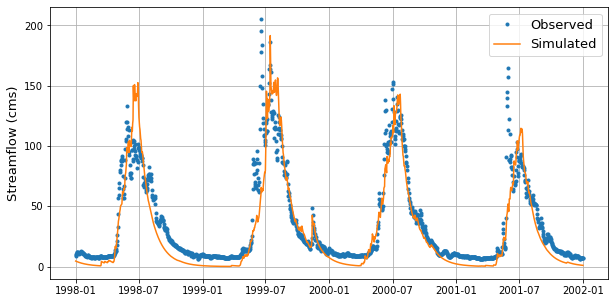

In [11]:
# Plot calibration performance
start=dates['start_spin']
end=dates['end_validation']
pl.figure(figsize=(10,5))
pl.plot(Qobs[start:end],'.',label='Observed')
pl.plot(flux['Q_cms'][start:end],label='Simulated')
pl.legend(fontsize=13)
pl.ylabel('Streamflow (cms)',fontsize=13); pl.grid()